In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

df = pd.read_csv('heart.csv')
df.isnull().sum()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [2]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
cols = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','target']

cm = np.corrcoef(df[cols].values.T)
cm

array([[ 1.        , -0.0984466 , -0.06865302,  0.27935091,  0.21367796,
         0.12130765, -0.1162109 , -0.39852194,  0.09680083, -0.22543872],
       [-0.0984466 ,  1.        , -0.04935288, -0.05676882, -0.19791217,
         0.04503179, -0.05819627, -0.04401991,  0.14166381, -0.28093658],
       [-0.06865302, -0.04935288,  1.        ,  0.04760776, -0.07690439,
         0.09444403,  0.04442059,  0.29576212, -0.39428027,  0.43379826],
       [ 0.27935091, -0.05676882,  0.04760776,  1.        ,  0.12317421,
         0.17753054, -0.11410279, -0.04669773,  0.06761612, -0.14493113],
       [ 0.21367796, -0.19791217, -0.07690439,  0.12317421,  1.        ,
         0.0132936 , -0.15104008, -0.00993984,  0.06702278, -0.08523911],
       [ 0.12130765,  0.04503179,  0.09444403,  0.17753054,  0.0132936 ,
         1.        , -0.08418905, -0.00856711,  0.02566515, -0.02804576],
       [-0.1162109 , -0.05819627,  0.04442059, -0.11410279, -0.15104008,
        -0.08418905,  1.        ,  0.04412344

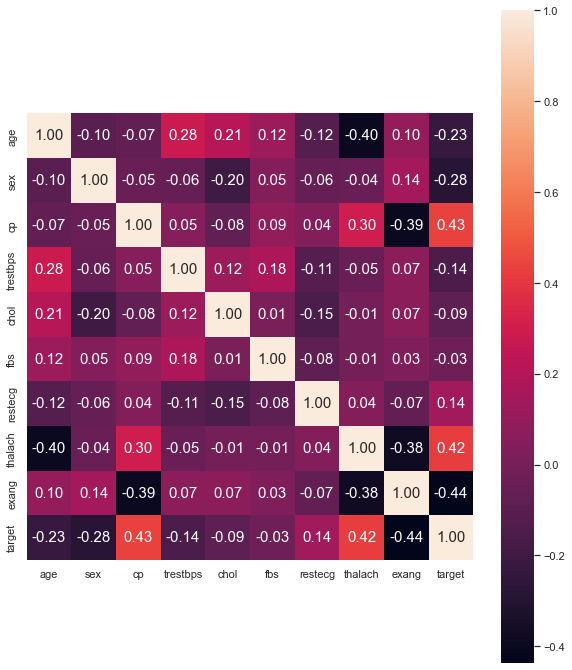

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

plt.figure(figsize=(10,12))

sns.heatmap(data=cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':15}, square=True, yticklabels=cols, xticklabels=cols)

plt.show()


In [3]:
X = df.drop(columns = 'target', axis=1)
y = df['target']

In [4]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# splitting training and test data


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Logistic Regression & Training of model

In [6]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Suvronil Chatterjee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
X_training_predict = model.predict(X_train)
target_accuracy = accuracy_score(X_training_predict, y_train)

print("Accuracy on training dataset is: ", target_accuracy)

Accuracy on training dataset is:  0.8512396694214877


In [12]:
X_test_predict = model.predict(X_test)
target_accuracy = accuracy_score(X_test_predict, y_test)

print("Accuracy on test dataset is: ", target_accuracy)

Accuracy on test dataset is:  0.819672131147541


# Building the predictor

In [16]:
input_data = (43,0,2,122,213,0,1,165,0,0.2,1,0,2)

input_data_numpy = np.asarray(input_data)
input_data_reshaped = input_data_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if(prediction[0]==0):
    print("The person has no heart disease")
else:
    print("The person has R-type defect of heart disease")

The person has R-type defect of heart disease
